In [ ]:
pip install rarfile


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Required Packages

In [ ]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam

#Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Extracting the dataset

In [ ]:
import rarfile

file_name = "face.rar"

with rarfile.RarFile(file_name, "r") as rf:
    rf.extractall()
    print('Done')


Done


# Importing The Dataset

In [ ]:
file_path = "/content/face"

# Visualization of Face Expression Dataset

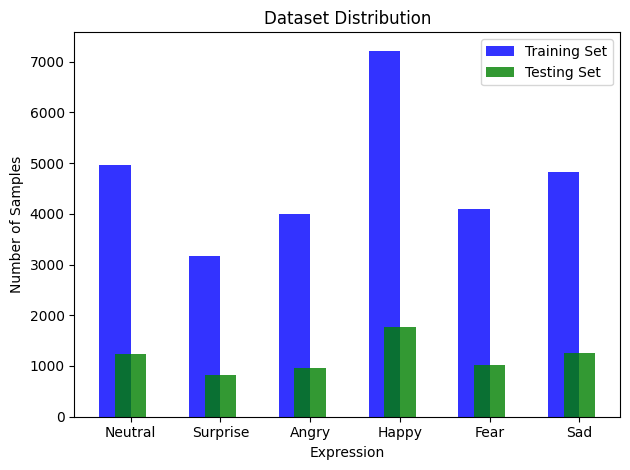

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the path to the dataset folders
train_set = "/content/face/Training"
test_set = "/content/face/Testing"

# Initialize empty lists for storing the class names and number of samples in each class
class_names = []
train_samples = []
test_samples = []

# Loop through the subfolders in the training set and count the number of samples in each class
for subdir in os.listdir(train_set):
    class_names.append(subdir)
    subdir_path = os.path.join(train_set, subdir)
    train_samples.append(len(os.listdir(subdir_path)))

# Loop through the subfolders in the testing set and count the number of samples in each class
for subdir in os.listdir(test_set):
    subdir_path = os.path.join(test_set, subdir)
    test_samples.append(len(os.listdir(subdir_path)))

# Plot the bar graph
fig, ax = plt.subplots()
index = list(range(len(class_names)))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, train_samples, bar_width,
                alpha=opacity, color='b',
                label='Training Set')

rects2 = ax.bar([i + bar_width/2 for i in index], test_samples, bar_width,
                alpha=opacity, color='g',
                label='Testing Set')

ax.set_xlabel('Expression')
ax.set_ylabel('Number of Samples')
ax.set_title('Dataset Distribution')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(class_names)
ax.legend()

plt.tight_layout()
plt.show()


#  Visualising the Images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_set = "/content/face/Training"
test_set = "/content/face/Testing"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)  # Create a new ImageDataGenerator for the testing data

train_generator = train_datagen.flow_from_directory(
        train_set,
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        classes=['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

test_generator = test_datagen.flow_from_directory(
        test_set,  # Use the testing directory path
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        classes=['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])



Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


# Displaying Images of every class

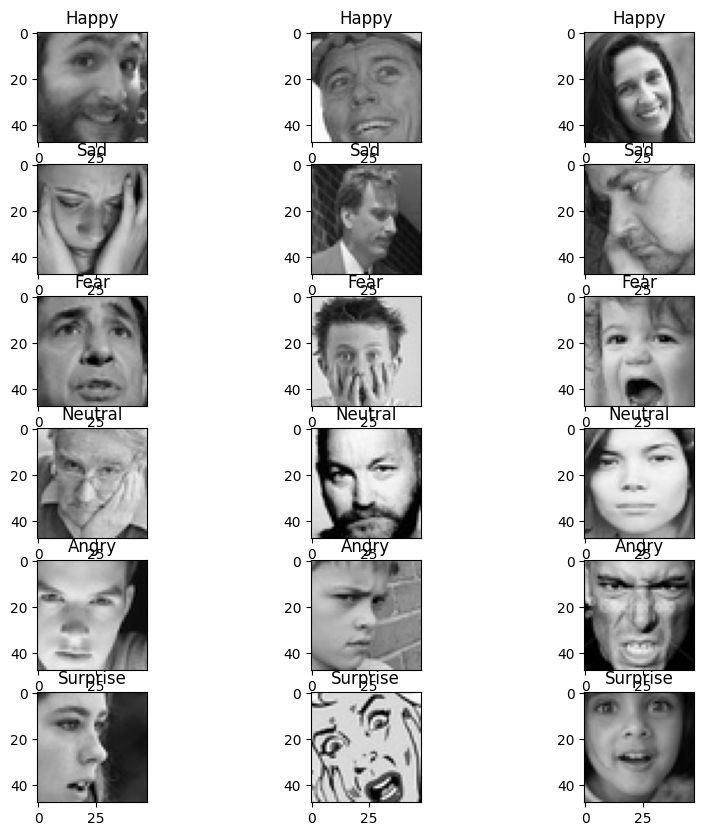

In [ ]:
picture_size = 48
train_set = '/content/face/Training'

classes = ['Happy', 'Sad', 'Fear', 'Neutral', 'Angry', 'Surprise']

plt.figure(figsize=(10,10))
for c in classes:
    folder_path = train_set + '/' + c
    for i in range(1, 4):
        plt.subplot(6, 3, classes.index(c)*3 + i)
        img = load_img(folder_path + '/' + os.listdir(folder_path)[i], target_size=(picture_size, picture_size))
        plt.imshow(img)
        plt.title(c)
plt.show()


### Displaying Images-Happy

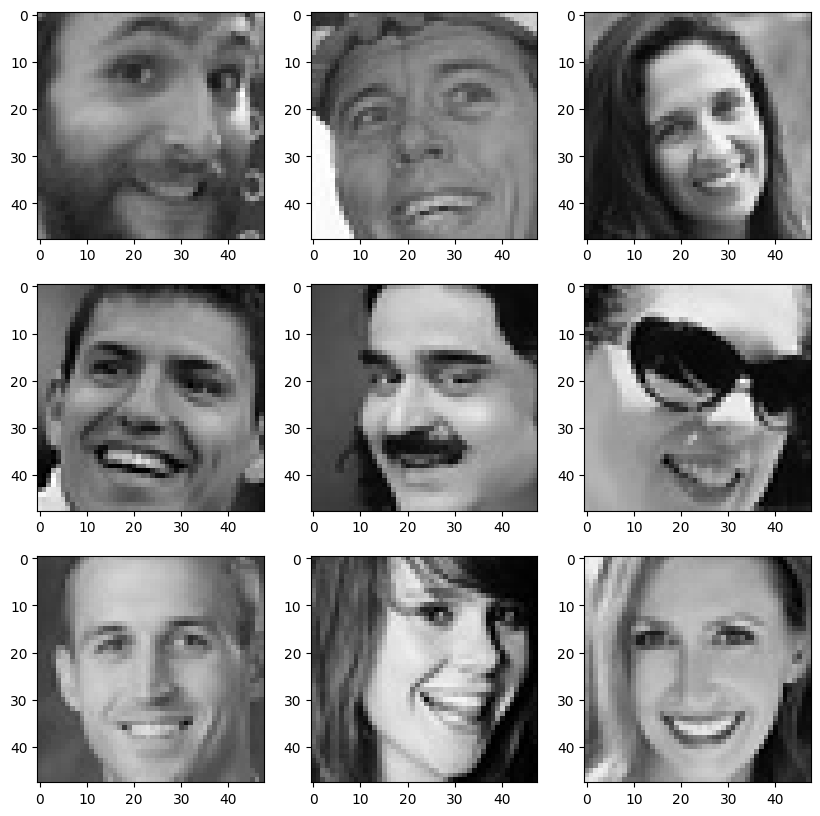

In [ ]:
picture_size = 48
train_set = '/content/face/Training'

expression = 'Happy'

folder_path = train_set  # define folder_path as train_dir

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))  # use folder_path variable to load images
    plt.imshow(img)   
plt.show()


### Displaying Images-Sad

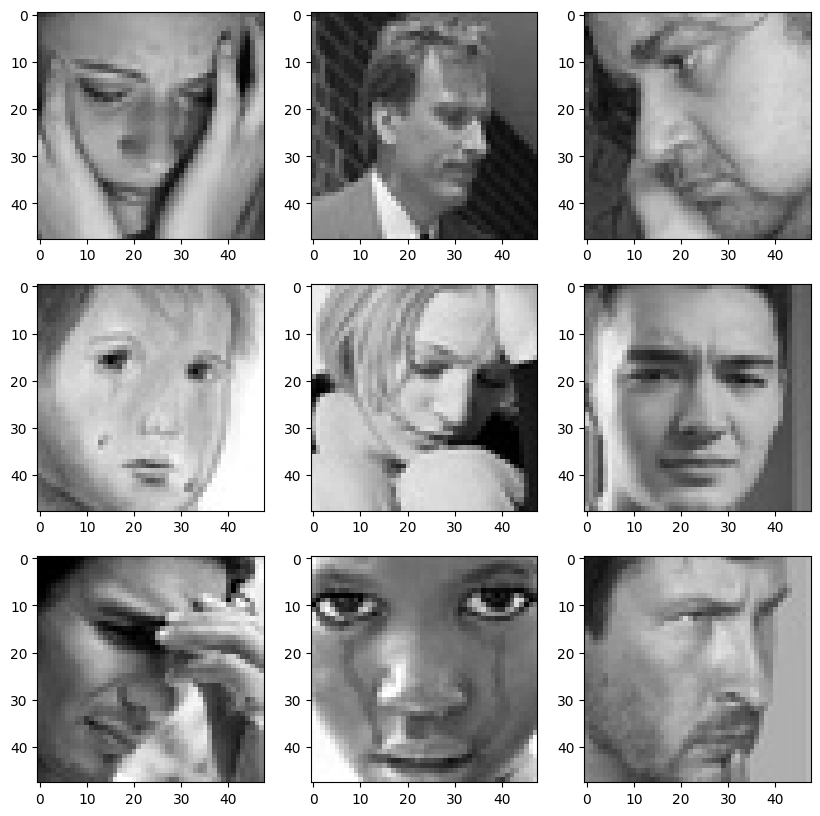

In [ ]:
expression = 'Sad'

folder_path = train_set  # define folder_path as train_dir

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))  # use folder_path variable to load images
    plt.imshow(img)   
plt.show()


### Displaying Images-Neutral

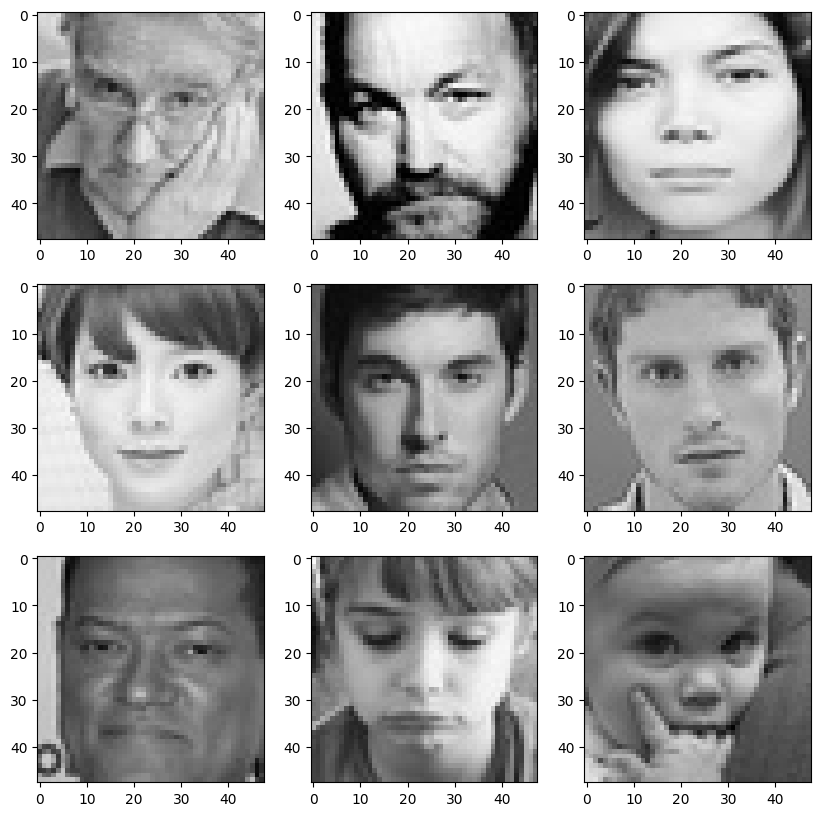

In [ ]:
expression = 'Neutral'

folder_path = train_set  # define folder_path as train_dir

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))  # use folder_path variable to load images
    plt.imshow(img)   
plt.show()

### Displaying Images-Angry

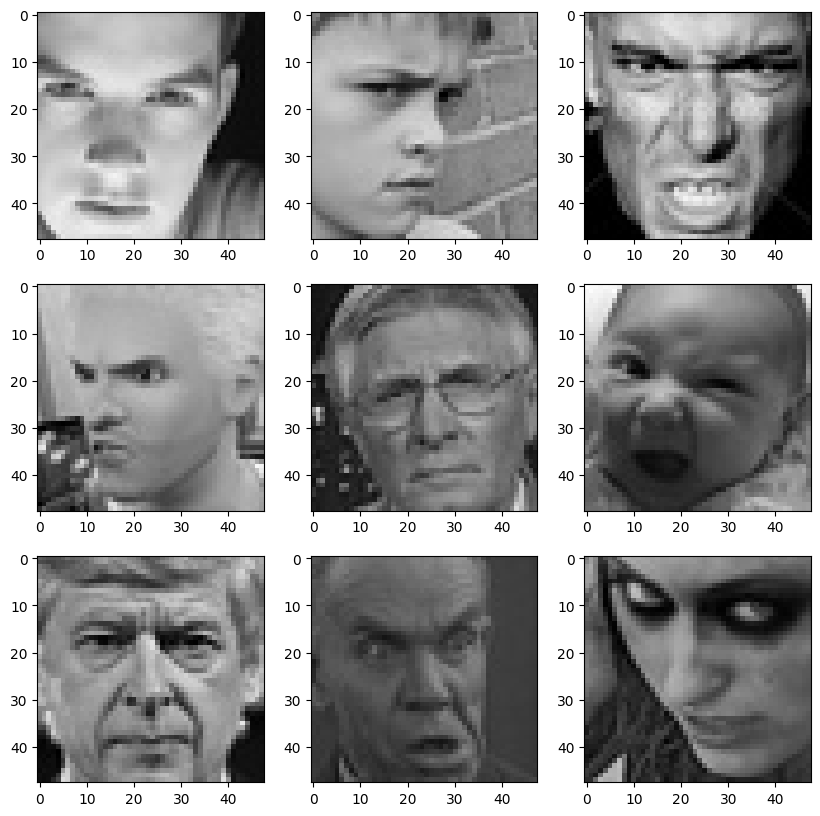

In [ ]:
expression = 'Angry'

folder_path = train_set  # define folder_path as train_dir

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))  # use folder_path variable to load images
    plt.imshow(img)   
plt.show()

### Displaying Images-Fear

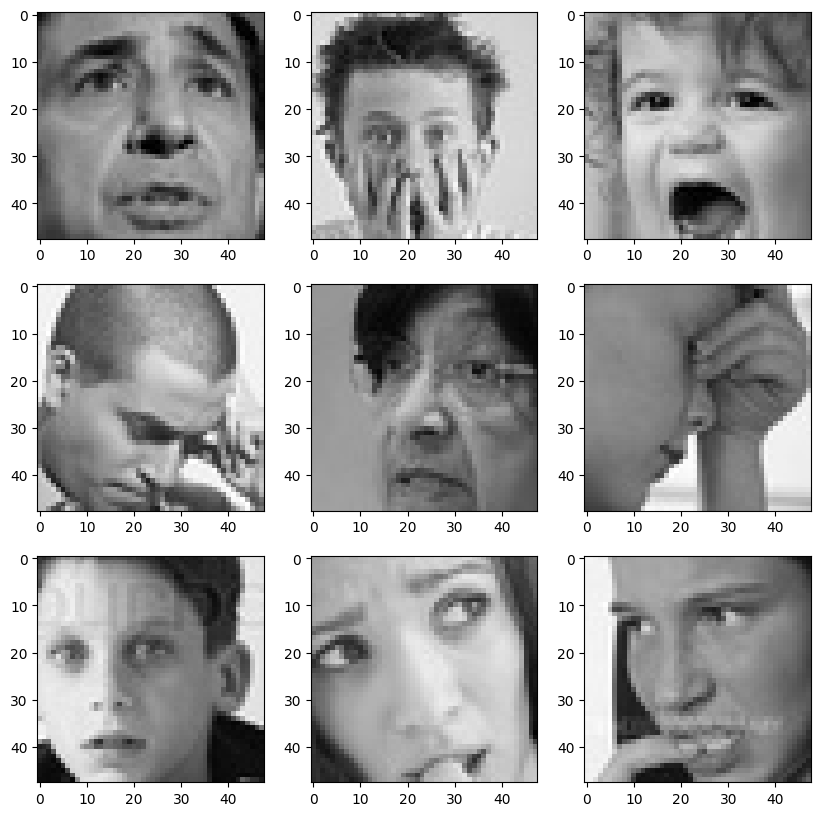

In [ ]:
expression = 'Fear'

folder_path = train_set  # define folder_path as train_dir

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))  # use folder_path variable to load images
    plt.imshow(img)   
plt.show()

### Displaying Images-Surprise

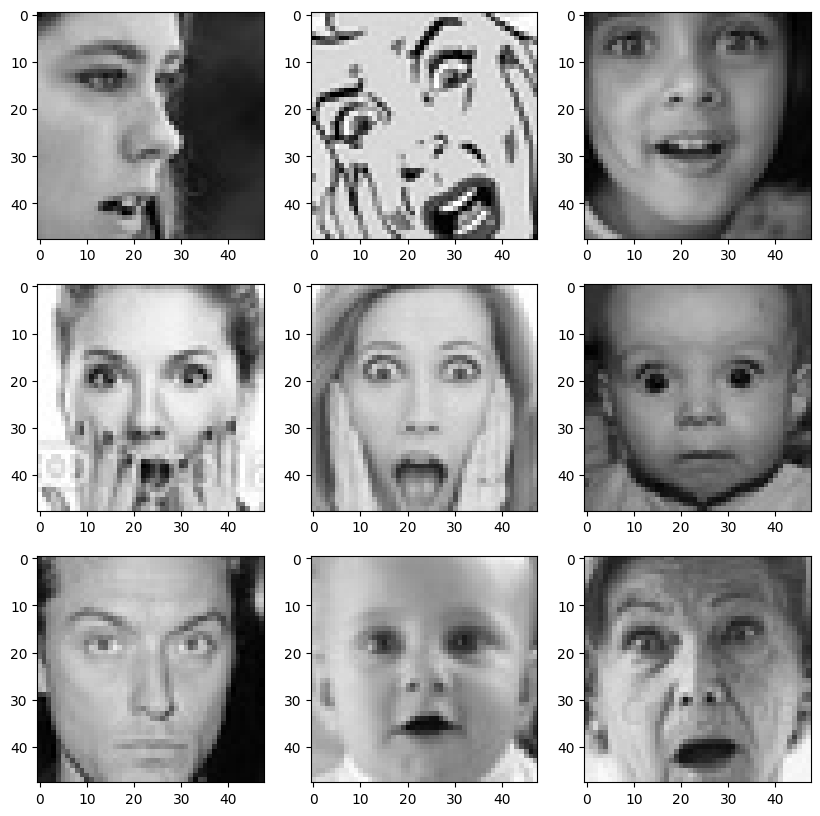

In [ ]:
expression = 'Surprise'

folder_path = train_set  # define folder_path as train_dir

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))  # use folder_path variable to load images
    plt.imshow(img)   
plt.show()

#  Preparing and Pre-Processing the data

In [ ]:
import os
import cv2
import numpy as np

# Set the path to the dataset folders
train_set = "/content/face/Training"
test_set = "/content/face/Testing"

# Define a function to load and pre-process the images
def load_images(directory):
    images = []
    labels = []
    for expression_type in os.listdir(directory):
        expression_dir = os.path.join(directory, expression_type)
        for filename in os.listdir(expression_dir):
            # Load the image and convert to grayscale
            img = cv2.imread(os.path.join(expression_dir, filename), cv2.IMREAD_GRAYSCALE)
            # Resize the image to 48x48 pixels
            img = cv2.resize(img, (48, 48))
            # Normalize the pixel values to be between 0 and 1
            img = img.astype('float32') / 255.0
            # Append the pre-processed image and its corresponding label to the lists
            images.append(img)
            labels.append(expression_type)
    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the training and testing data
train_images, train_labels = load_images(train_set)
test_images, test_labels = load_images(test_set)

# Print the shape of the training and testing data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


Training images shape: (28273, 48, 48)
Training labels shape: (28273,)
Testing images shape: (7067, 48, 48)
Testing labels shape: (7067,)


# Model Building

#### 1.CNN

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define the paths to the training and testing sets
train_set = "/content/face/Training"
test_set = "/content/face/Testing"

# Define the number of classes and input shape
num_classes = 6
input_shape = (48, 48, 1)

# Define the CNN model
model = Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Load the training and testing data
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    train_set, 
    target_size=input_shape[:2], 
    batch_size=32, 
    color_mode='grayscale'
)

test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    test_set, 
    target_size=input_shape[:2], 
    batch_size=32, 
    color_mode='grayscale'
)

# Train the model with early stopping
early_stop = EarlyStopping(patience=5)
history = model.fit(
    train_data,
    epochs=50,
    validation_data=test_data,
    callbacks=[early_stop]
)

#Save the model to an .h5 file
model_filename = "my_model.h5"
model.save(os.path.join(os.getcwd(), model_filename))

#Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_data)
print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)



Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Epoch 1/50
884/884 [==============================] - 146s 163ms/step - loss: 1.7337 - accuracy: 0.2660 - val_loss: 1.6323 - val_accuracy: 0.3134
Epoch 2/50
884/884 [==============================] - 143s 162ms/step - loss: 1.6366 - accuracy: 0.3271 - val_loss: 1.4870 - val_accuracy: 0.4072
Epoch 3/50
884/884 [==============================] - 142s 161ms/step - loss: 1.5481 - accuracy: 0.3780 - val_loss: 1.4227 - val_accuracy: 0.4232
Epoch 4/50
884/884 [==============================] - 146s 165ms/step - loss: 1.4968 - accuracy: 0.3989 - val_loss: 1.3347 - val_accuracy: 0.4774
Epoch 5/50
884/884 [==============================] - 143s 162ms/step - loss: 1.4602 - accuracy: 0.4213 - val_loss: 1.3156 - val_accuracy: 0.4838
Epoch 6/50
884/884 [==============================] - 143s 162ms/step - loss: 1.4378 - accuracy: 0.4284 - val_loss: 1.2659 - val_accuracy: 0.5097
Epoch 7/50
884/884 [===================

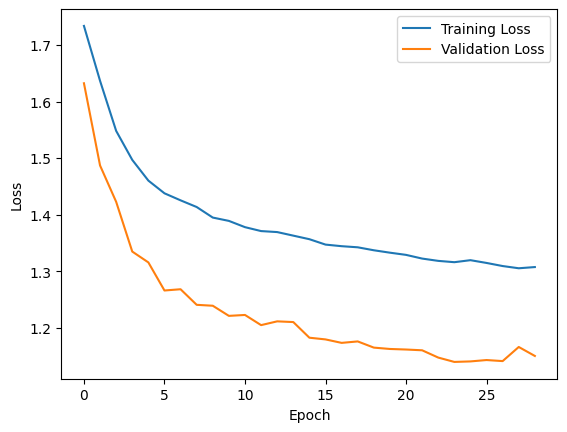

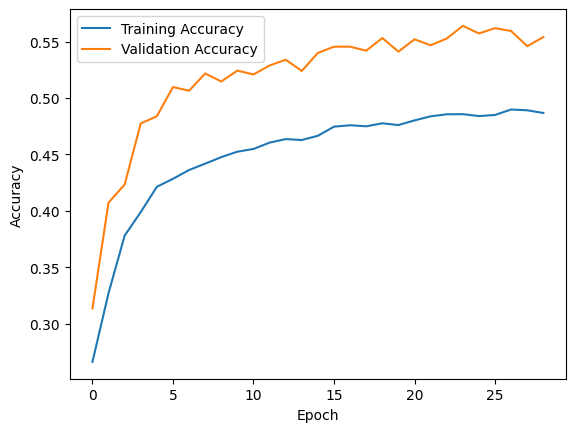

In [ ]:
# Extract the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

221/221 [==============================] - 19s 84ms/step


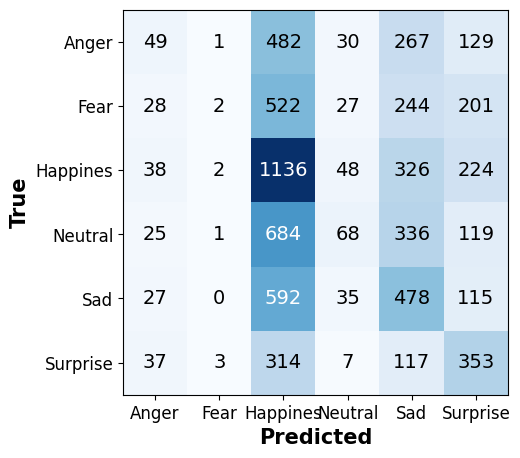

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted classes for the testing set
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true classes for the testing set
Y_true = []
for images, labels in test_data:
    Y_true.append(labels.numpy())
Y_true = np.concatenate(Y_true)
Y_true = np.argmax(Y_true, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_true, y_pred)

# Define the class labels
classes = ['Anger', 'Fear', 'Happines', 'Neutral', 'Sad', 'Surprise']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted', fontsize=15, fontweight='bold')
ax.set_ylabel('True', fontsize=15, fontweight='bold')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12)

# Add the numbers to the plot
thresh = cm.max() / 2.
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=14)

plt.show()


2.LTSM

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define the paths to the training and testing sets
train_set = "/content/face/Training"
test_set = "/content/face/Testing"

# Define the number of classes and input shape
num_classes = 6
input_shape = (100, 1) # input vector has 100 dimensions, with an added dimension of 1

# Define the LSTM model
model = Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=input_shape),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Data preprocessing and augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomCrop(100, 1),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_set, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=input_shape[:2],
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

train_data = train_data.map(lambda x, y: (data_augmentation(x), y))

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_set, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=input_shape[:2],
    shuffle=False,
    seed=42
)

# Train the model
history = model.fit(train_data,
                    epochs=30,
                    validation_data=test_data)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_data)
print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)

# Save the model to an .h5 file
#model_filename = "my_model2.h5"
#model.save(os.path.join(os.getcwd(), model_filename))


Found 28273 files belonging to 6 classes.
Using 22619 files for training.
Found 7067 files belonging to 6 classes.
Epoch 1/30
707/707 [==============================] - 176s 241ms/step - loss: 1.7484 - accuracy: 0.2638 - val_loss: 1.7330 - val_accuracy: 0.2792
Epoch 2/30
707/707 [==============================] - 166s 235ms/step - loss: 1.7343 - accuracy: 0.2666 - val_loss: 1.7153 - val_accuracy: 0.2790
Epoch 3/30
707/707 [==============================] - 171s 242ms/step - loss: 1.7269 - accuracy: 0.2712 - val_loss: 1.7165 - val_accuracy: 0.2802
Epoch 4/30
707/707 [==============================] - 171s 242ms/step - loss: 1.7234 - accuracy: 0.2720 - val_loss: 1.7243 - val_accuracy: 0.2819
Epoch 5/30
707/707 [==============================] - 170s 240ms/step - loss: 1.7218 - accuracy: 0.2730 - val_loss: 1.7136 - val_accuracy: 0.2816
Epoch 6/30
707/707 [==============================] - 166s 234ms/step - loss: 1.7197 - accuracy: 0.2743 - val_loss: 1.7057 - val_accuracy: 0.2806
Epoch 7/3

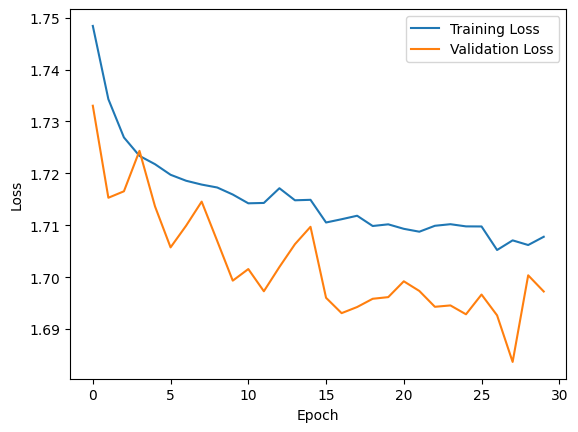

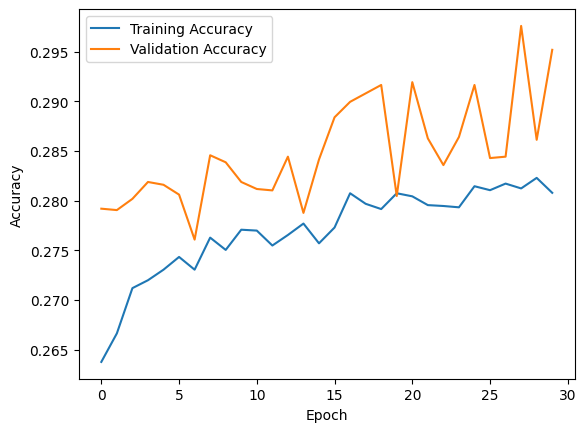

In [ ]:
import matplotlib.pyplot as plt
# Extract the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

221/221 [==============================] - 19s 88ms/step


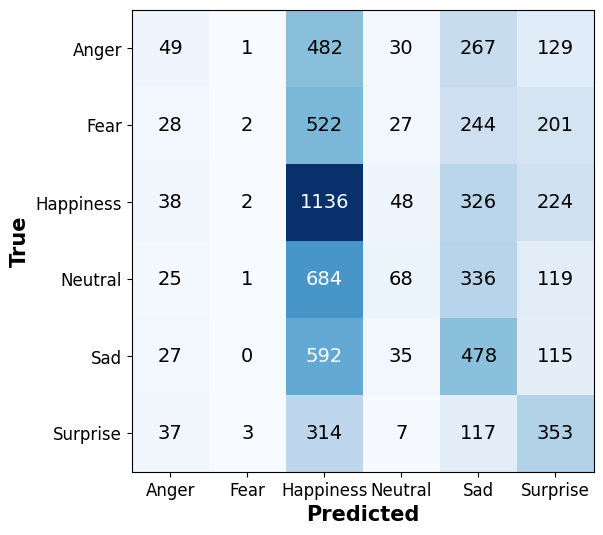

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted classes for the testing set
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true classes for the testing set
Y_true = []
for images, labels in test_data:
    Y_true.append(np.argmax(labels.numpy(), axis=1))
Y_true = np.concatenate(Y_true)

# Generate the confusion matrix
cm = confusion_matrix(Y_true, y_pred)

# Define the class labels
classes = ['Anger', 'Fear', 'Happiness', 'Neutral', 'Sad', 'Surprise']

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted', fontsize=15, fontweight='bold')
ax.set_ylabel('True', fontsize=15, fontweight='bold')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12)

# Add the numbers to the plot
thresh = cm.max() / 2.
for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=14)

plt.show()


# Accuracy Comparison

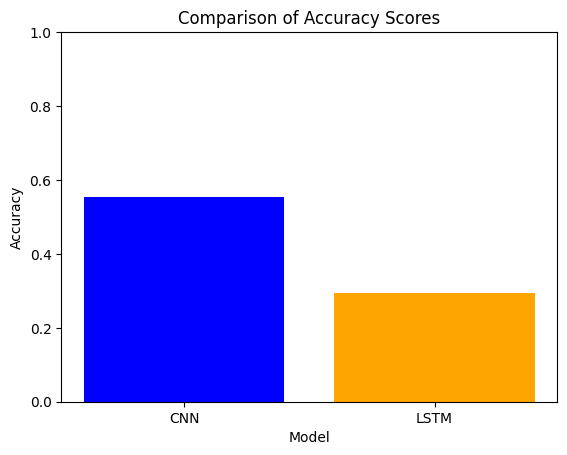

In [31]:
import matplotlib.pyplot as plt

# Accuracy scores for CNN and LSTM
cnn_acc = 0.5539833307266235
lstm_acc = 0.2951747477054596

# Bar plot to compare the accuracy scores
models = ['CNN', 'LSTM']
accuracy = [cnn_acc, lstm_acc]

plt.bar(models, accuracy, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Comparison of Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
